In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
import os
import pandas as pd
from fbprophet import Prophet
import numpy as np

# Data Load

## Using os package

In [225]:
p = os.getcwd()
print(p)

/content


In [226]:
os.listdir(p)

['.config', 'drive', 'sample_data']

In [227]:
data_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Multi", "Data")
data_dir

'/content/drive/MyDrive/Multi/Data'

In [228]:
# os.path의 is file method.
# 해당 경로가 파일인지 확인하는 method. 비슷한 method로 isdir 등이 있다.
f_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
f_names

['/content/drive/MyDrive/Multi/Data/아파트매매가격지수_경기도_10년.csv']

In [229]:
os.listdir(data_dir)

['아파트매매가격지수_경기도_10년.csv']

## Opening csv data file

In [230]:
data = pd.read_csv(f_names[0])
data.head()

,date,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
0,2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,...,68.8,82.3,89.2,92.6,71.1,73.0,82.4,82.0,93.6,102.8
1,2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,...,68.5,81.9,89.4,92.8,70.9,72.9,82.0,81.7,93.6,102.8
2,2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,...,68.4,81.6,89.7,92.8,70.8,72.8,81.9,81.4,93.6,102.7
3,2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,...,68.4,80.6,90.1,93.5,70.7,73.2,82.3,81.7,93.9,102.7
4,2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,...,68.5,80.7,90.4,93.8,71.0,73.6,82.3,81.9,94.7,103.6


# FaceBook PROPHET Basic

## Format the Data

In [231]:
df = data[['date', '수원시']]

In [232]:
df.columns = ['ds','y']

In [233]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Create and Fit Model

In [234]:
prediction_size = 12
train = df[:-prediction_size]
test = df[-prediction_size:]

In [235]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.01)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


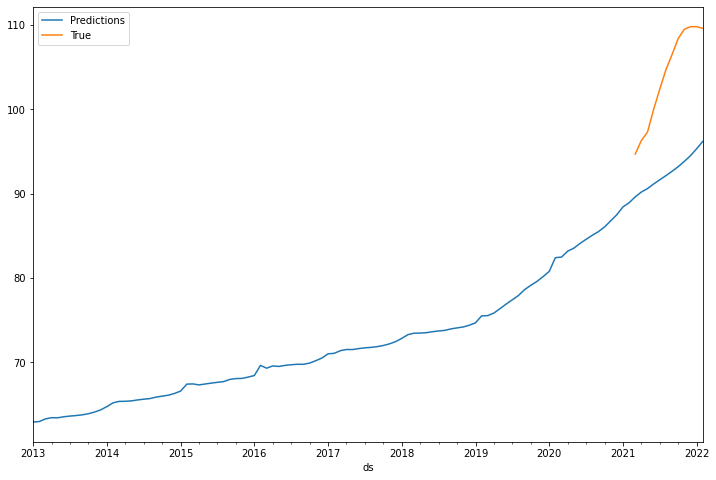

In [236]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [237]:
m = Prophet(changepoint_range=0.8, changepoint_prior_scale=0.05)
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


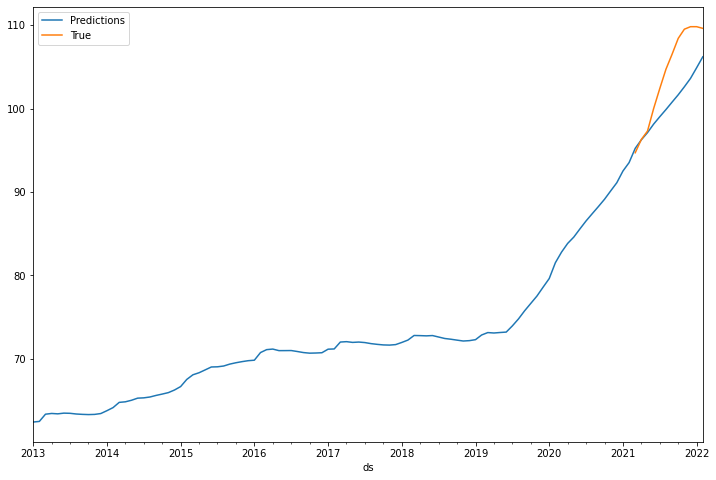

In [238]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True',legend=True,ax=ax,xlim=('2013-01-01','2022-02-01'))

In [239]:
df.head()

,ds,y
0,2013-01-01,63.4
1,2013-02-01,63.3
2,2013-03-01,63.2
3,2013-04-01,63.3
4,2013-05-01,63.4


### Step 1: Create "future" placeholder dataframe

In [240]:
df.tail()

,ds,y
105,2021-10-01,108.4
106,2021-11-01,109.5
107,2021-12-01,109.8
108,2022-01-01,109.8
109,2022-02-01,109.6


In [241]:
future.tail()

,ds
105,2021-10-01
106,2021-11-01
107,2021-12-01
108,2022-01-01
109,2022-02-01


In [242]:
len(df)

110

In [243]:
len(future)


110

### Step 2: Predict and fill in the Future

In [244]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,62.668376,61.272512,63.639653,62.668376,62.668376,-0.221453,-0.221453,-0.221453,-0.221453,-0.221453,-0.221453,0.0,0.0,0.0,62.446924
1,2013-02-01,62.793789,61.233665,63.805781,62.793789,62.793789,-0.273653,-0.273653,-0.273653,-0.273653,-0.273653,-0.273653,0.0,0.0,0.0,62.520137
2,2013-03-01,62.907066,62.131345,64.665088,62.907066,62.907066,0.478993,0.478993,0.478993,0.478993,0.478993,0.478993,0.0,0.0,0.0,63.386059
3,2013-04-01,63.032479,62.157180,64.750031,63.032479,63.032479,0.441199,0.441199,0.441199,0.441199,0.441199,0.441199,0.0,0.0,0.0,63.473678
4,2013-05-01,63.153847,62.208007,64.578549,63.153847,63.153847,0.274312,0.274312,0.274312,0.274312,0.274312,0.274312,0.0,0.0,0.0,63.428158


In [245]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2021-10-01,102.077267,100.189328,103.176731,101.440896,102.733451,-0.433279,-0.433279,-0.433279,-0.433279,-0.433279,-0.433279,0.0,0.0,0.0,101.643988
106,2021-11-01,103.138547,101.156367,104.152175,102.400492,103.938082,-0.536955,-0.536955,-0.536955,-0.536955,-0.536955,-0.536955,0.0,0.0,0.0,102.601592
107,2021-12-01,104.165593,102.045295,105.140454,103.286540,105.099545,-0.556315,-0.556315,-0.556315,-0.556315,-0.556315,-0.556315,0.0,0.0,0.0,103.609278
108,2022-01-01,105.226873,103.209008,106.604078,104.201990,106.302708,-0.339631,-0.339631,-0.339631,-0.339631,-0.339631,-0.339631,0.0,0.0,0.0,104.887242
109,2022-02-01,106.288154,104.428608,107.965190,105.137962,107.502344,-0.095325,-0.095325,-0.095325,-0.095325,-0.095325,-0.095325,0.0,0.0,0.0,106.192829


In [246]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [247]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
98,2021-03-01,95.230002,93.923786,96.523437
99,2021-04-01,96.253488,94.953795,97.481731
100,2021-05-01,97.113646,95.830545,98.395939
101,2021-06-01,98.133711,96.814200,99.436652
102,2021-07-01,99.018443,97.697678,100.403727
103,2021-08-01,99.872199,98.509386,101.203702
104,2021-09-01,100.764518,99.416186,102.146709
105,2021-10-01,101.643988,100.189328,103.176731
106,2021-11-01,102.601592,101.156367,104.152175
107,2021-12-01,103.609278,102.045295,105.140454


### Plotting Forecast

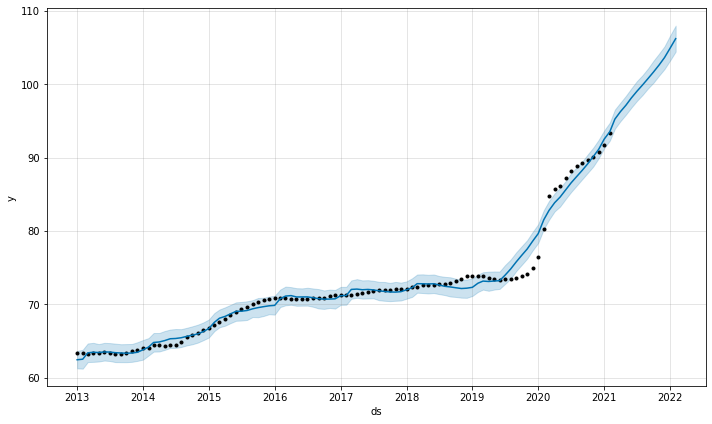

In [248]:
m.plot(forecast);

ConversionError: ignored

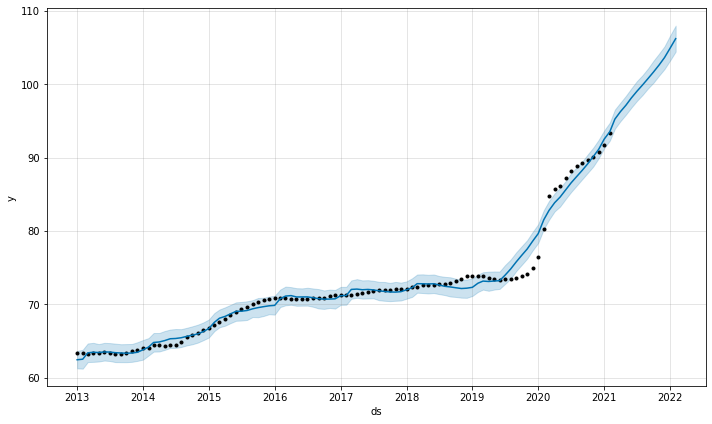

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2013-01-01','2022-02-01');

In [ ]:
forecast.plot(x='ds',y='yhat');

In [ ]:
m.plot_components(forecast);


In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Uncertainty Intervals
changepoint_prior_scale을 조절하면 예측 불확실성이 증가함

interval_width의 기본 값은 80%

### Uncertainty in the trend

In [ ]:
#forecast = Prophet(interval_width=0.95).fit(df).predict(future)

### Uncertainty in seasonality

시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함

mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻

In [ ]:
#m = Prophet(mcmc_samples=300)
#forecast = m.fit(df).predict(future)
#fig = m.plot_components(forecast)

## Outliers

너무 튀는 값이 존재해서 예측할 때 영향이 미치므로 제외하고 예측해야 함 ->NA, None로 설정

In [ ]:
# df.loc[(df['ds'] > '2015-01-01') & (df['ds'] < '2016-01-01'), 'y'] = None
#  model = Prophet().fit(df)
#  fig = model.plot(model.predict(future))

# Evaluation

## short

In [265]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [266]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [267]:
cmp_df = make_comparison_dataframe(df, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-01-01,62.446924,61.272512,63.639653,63.4
2013-02-01,62.520137,61.233665,63.805781,63.3
2013-03-01,63.386059,62.131345,64.665088,63.2
2013-04-01,63.473678,62.157180,64.750031,63.3
2013-05-01,63.428158,62.208007,64.578549,63.4


In [268]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [269]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 3.47651473241921
MAE 3.7282554248831006


## fbprophet.diagnostics

In [270]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [271]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [272]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-02 00:00:00 and 2020-02-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [273]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-01,76.145555,75.485145,76.798936,84.7,2020-02-02
1,2020-04-01,75.996856,75.332416,76.668429,85.7,2020-02-02
2,2020-05-01,75.895147,75.207941,76.618028,86.1,2020-02-02
3,2020-06-01,75.853595,75.145893,76.561779,87.2,2020-02-02
4,2020-07-01,75.828865,75.168212,76.496721,88.2,2020-02-02


In [274]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
7,2020-10-01,76.545981,75.819958,77.271891,89.7,2020-02-02
8,2020-11-01,76.995703,76.180762,77.774629,90.1,2020-02-02
9,2020-12-01,77.274731,76.489476,78.078600,90.7,2020-02-02
10,2021-01-01,77.346294,76.533009,78.214882,91.7,2020-02-02
11,2021-02-01,77.105855,76.224561,78.008725,93.4,2020-02-02


In [275]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,28 days,73.178524,8.554445,8.554445,0.100997,0.100997,0.0
1,59 days,94.151005,9.703144,9.703144,0.113222,0.113222,0.0
2,89 days,104.139025,10.204853,10.204853,0.118523,0.118523,0.0
3,120 days,128.740913,11.346405,11.346405,0.130119,0.130119,0.0
4,150 days,153.044990,12.371135,12.371135,0.140262,0.140262,0.0
5,181 days,165.022018,12.846090,12.846090,0.144663,0.144663,0.0
6,212 days,171.457703,13.094186,13.094186,0.146631,0.146631,0.0
7,242 days,173.028216,13.154019,13.154019,0.146645,0.146645,0.0
8,273 days,171.722599,13.104297,13.104297,0.145442,0.145442,0.0
9,303 days,180.237855,13.425269,13.425269,0.148018,0.148018,0.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


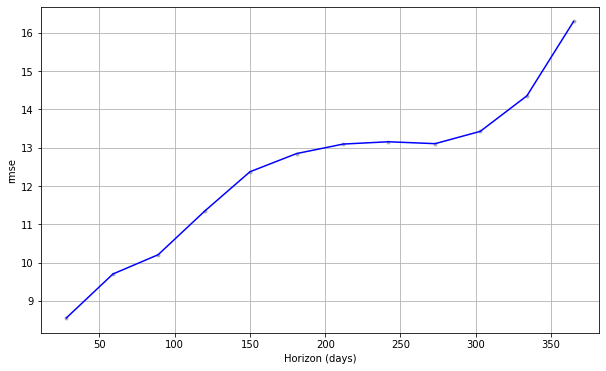

In [276]:
plot_cross_validation_metric(df_cv, metric='rmse');

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


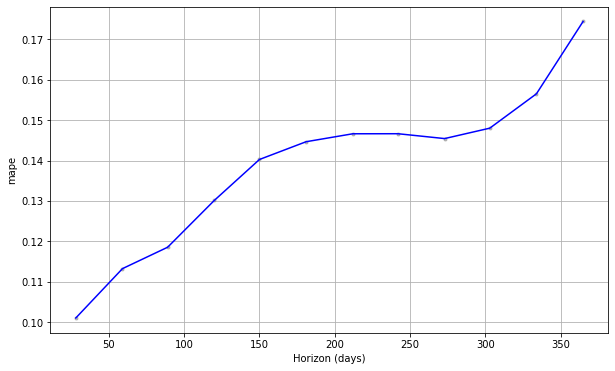

In [277]:
plot_cross_validation_metric(df_cv, metric='mape');